### Collaborative Filtering- Book Recommendation

In [32]:
import numpy as np
import pandas as pd

In [33]:
df_user=pd.read_csv("E:/May2022/2_Machine Learning/Demo Datasets/Lesson 10/BX-Users.csv")

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [34]:
df_user.head()

,user_id,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [35]:
#coloum Name, ISBN(international standard book number)
df_books=pd.read_csv("E:/May2022/2_Machine Learning/Demo Datasets/Lesson 10/BX-Books.csv")
df_books.head()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,isbn,book_title,book_author,year_of_publication,publisher
0,195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,2005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,60973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


In [36]:
#coloum Name, ISBN(international standard book number)
df=pd.read_csv("E:/May2022/2_Machine Learning/Demo Datasets/Lesson 10/BX-Book-Ratings.csv", nrows=10000)
df.head()

,user_id,isbn,rating
0,276725,034545104X,0
1,276726,155061224,5
2,276727,446520802,0
3,276729,052165615X,3
4,276729,521795028,6


In [37]:
df.shape

(10000, 3)

In [38]:
#rating Range (1-10)
df.describe()

,user_id,rating
count,10000.000000,10000.000000
mean,265844.379600,1.974700
std,56937.189618,3.424884
min,2.000000,0.000000
25%,277478.000000,0.000000
50%,278418.000000,0.000000
75%,278418.000000,4.000000
max,278854.000000,10.000000


In [39]:
df=pd.merge(df,df_books, on='isbn')
df.head()

,user_id,isbn,rating,book_title,book_author,year_of_publication,publisher
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
1,276726,155061224,5,Rites of Passage,Judith Rae,2001,Heinle
2,276727,446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books
3,278418,446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books
4,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999,Cambridge University Press


In [40]:
n_users=df.user_id.nunique()
n_books=df.isbn.nunique()

print("Num of Users:"+str(n_users))
print("Num of Books:"+str(n_books))


Num of Users:828
Num of Books:8051


#### Convert ISBN to numeric numbers in order

In [41]:
isbn_list=df.isbn.unique()
print("Length of isbn List:", len(isbn_list))
def get_isbn_numeric_id(isbn):
    itemindex=np.where(isbn_list==isbn)
    return itemindex[0][0]

Length of isbn List: 8051


####  Convert User_ID to numeric numbers in order

In [42]:
user_id_list=df.user_id.unique()
print("Length of user_id List:", len(user_id_list))
def get_user_id_numeric_id(user_id):
    itemindex=np.where(user_id_list==user_id)
    return itemindex[0][0]

Length of user_id List: 828


In [43]:
df['user_id_order']=df["user_id"].apply(get_user_id_numeric_id)

In [44]:
df["isbn_id"]=df["isbn"].apply(get_isbn_numeric_id)

In [45]:
df.head()

,user_id,isbn,rating,book_title,book_author,year_of_publication,publisher,user_id_order,isbn_id
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,0,0
1,276726,155061224,5,Rites of Passage,Judith Rae,2001,Heinle,1,1
2,276727,446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,2,2
3,278418,446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,3,2
4,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999,Cambridge University Press,4,3


#### Re-Index columns to biuld matrix later on

In [46]:
new_col_order=['user_id_order', 'isbn_id', 'rating', 'book_title', 'book_author',
       'year_of_publication', 'publisher', 'user_id', 'isbn']
df=df.reindex(columns=new_col_order)
df.head()

,user_id_order,isbn_id,rating,book_title,book_author,year_of_publication,publisher,user_id,isbn
0,0,0,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,276725,034545104X
1,1,1,5,Rites of Passage,Judith Rae,2001,Heinle,276726,155061224
2,2,2,0,The Notebook,Nicholas Sparks,1996,Warner Books,276727,446520802
3,3,2,0,The Notebook,Nicholas Sparks,1996,Warner Books,278418,446520802
4,4,3,3,Help!: Level 1,Philip Prowse,1999,Cambridge University Press,276729,052165615X


#### Train Test Split

Recommendation Systems are difficult to evaluate. butyou still learn how to evaluate them. In Order to do this, we will split the data into two sets. However you won't do your classic X_train, X_test, y_train, y_test. Insted, you can actually just segment the data into two sets of data 

In [47]:
from sklearn.model_selection import train_test_split
train_data, test_data= train_test_split(df, test_size=0.30)

#### Collaborative Filtering

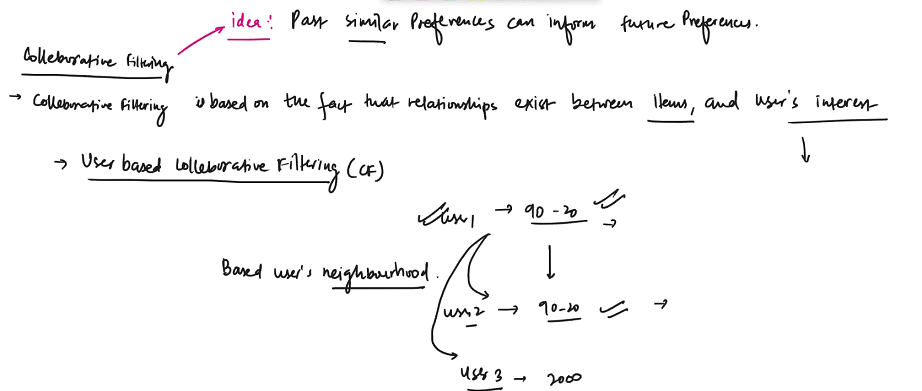

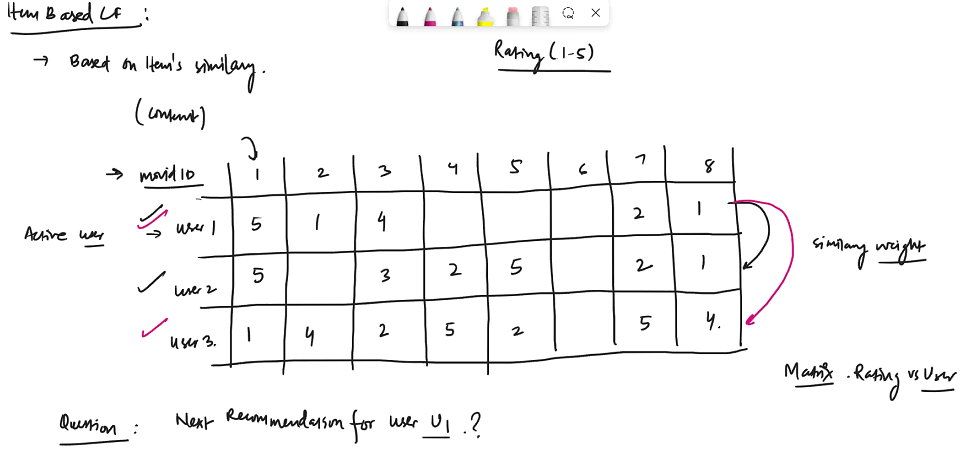

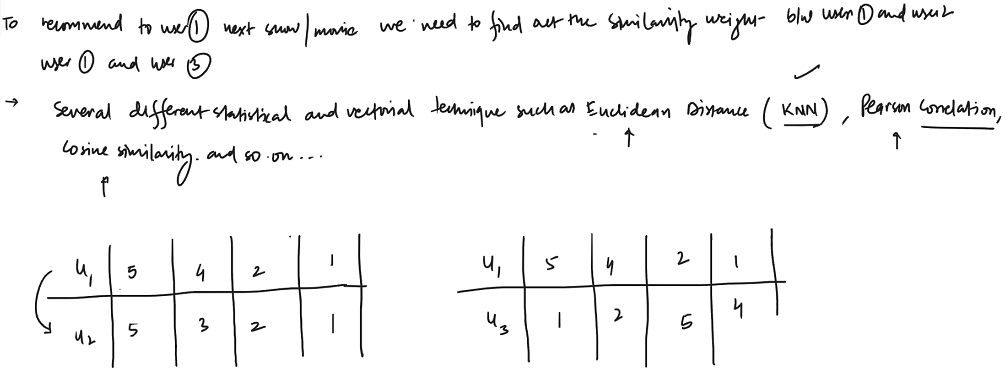

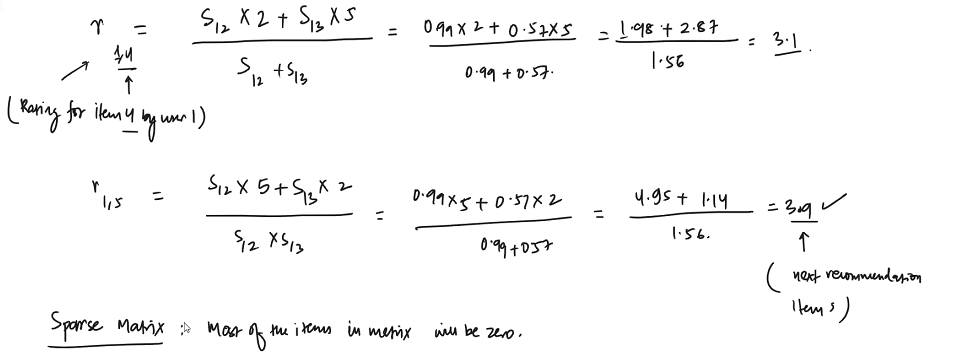

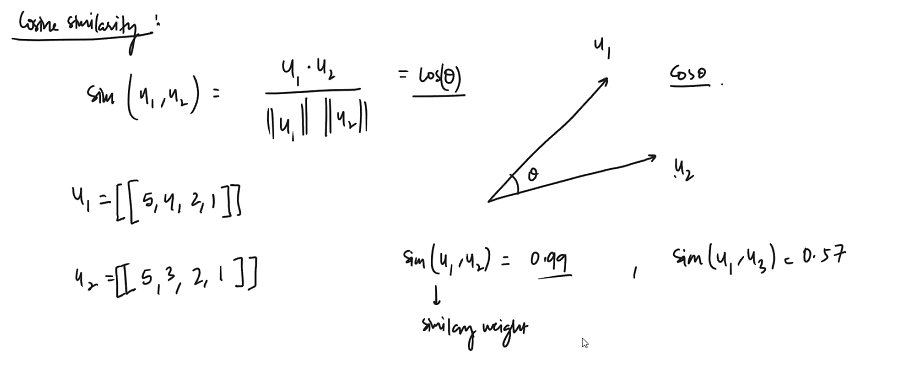

In This case, you create a user-book matrix (sparse matrix) which is built from the entire dataset.
Since we have split the data into testing and training, you will need to create two ''[828 x 8051]'' matrices (all user by all books).This is going to be a very large matrix

The training matrix contain 70% of the ratings and the testing matrix contains 30% of the ratings.

####  Create two user-book matrix one for training & other for testing

In [48]:
# zero matrix of training samples x test samples
train_data_matrix=np.zeros((n_users, n_books))
for line in train_data.itertuples():
    train_data_matrix[line[1]-1, line[2]-1]=line[3]

In [49]:
test_data_matrix=np.zeros((n_users, n_books))
for line in test_data.itertuples():
    test_data_matrix[line[1]-1, line[2]-1]=line[3]

In [50]:
train_data_matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

* you can use the **pairwise_distance** function from sklearn to calculate the cosine similarity. 
* note the, output will range from 0 to 1 since the ratings are all positives.

#### Cosine Similarity between all users

In [51]:
from sklearn.metrics.pairwise import pairwise_distances
# cosine similarity 
user_similarity = pairwise_distances(train_data_matrix, metric='cosine')

In [52]:
user_similarity

array([[0., 1., 1., ..., 1., 1., 1.],
       [1., 0., 1., ..., 1., 1., 1.],
       [1., 1., 0., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 0., 1., 1.],
       [1., 1., 1., ..., 1., 0., 1.],
       [1., 1., 1., ..., 1., 1., 0.]])

In [53]:
# cosine similarity 
item_similarity = pairwise_distances(train_data_matrix.T, metric='cosine')

In [54]:
item_similarity

array([[0., 1., 1., ..., 1., 1., 1.],
       [1., 0., 1., ..., 1., 1., 1.],
       [1., 1., 0., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 0., 1., 1.],
       [1., 1., 1., ..., 1., 0., 1.],
       [1., 1., 1., ..., 1., 1., 0.]])

In [55]:
def predict(ratings, similarity, type='user'):
    if type=='user':
        mean_user_rating = ratings.mean(axis=1)
        # You use np.newaxis so that mean_user_ratings has same format as ratings
        ratings_diff=(ratings - mean_user_rating[:, np.newaxis])
        pred = mean_user_rating[:, np.newaxis] + similarity.dot(ratings_diff)/np.array([np.abs(similarity).sum(axis=1)]).T
    elif type=='item':
        pred = ratings.dot(similarity) / np.array([np.abs(similarity).sum(axis=1)])
    return pred

In [56]:
user_prediction = predict(train_data_matrix, user_similarity, type='user')

In [57]:
item_prediction = predict(train_data_matrix, item_similarity, type='item')

In [58]:
item_prediction

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.05913043, 0.05913043, 0.05913778, ..., 0.05918259, 0.05913043,
        0.05913043],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

#### Evaluation

* There are many evaluation metrics, but one of most popular metric to evaluate accuracy of predicted Rating is RMSE (Root Mean Squared Error)

In [59]:
from sklearn.metrics import mean_squared_error
from math import sqrt
def rmse(prediction, ground_truth):
    prediction = prediction[ground_truth.nonzero()].flatten()
    ground_truth = ground_truth[ground_truth.nonzero()].flatten()
    return sqrt(mean_squared_error(prediction, ground_truth))

In [60]:
print('user-based CF RMSE: ' + str(rmse(user_prediction, test_data_matrix)))
print('user-based CF RMSE: ' + str(rmse(item_prediction, test_data_matrix)))

user-based CF RMSE: 7.632507931168779
user-based CF RMSE: 7.631778857325446


#### Recommendation using Nearest Neighbours

In [61]:
df

,user_id_order,isbn_id,rating,book_title,book_author,year_of_publication,publisher,user_id,isbn
0,0,0,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,276725,034545104X
1,1,1,5,Rites of Passage,Judith Rae,2001,Heinle,276726,155061224
2,2,2,0,The Notebook,Nicholas Sparks,1996,Warner Books,276727,446520802
3,3,2,0,The Notebook,Nicholas Sparks,1996,Warner Books,278418,446520802
4,4,3,3,Help!: Level 1,Philip Prowse,1999,Cambridge University Press,276729,052165615X
...,...,...,...,...,...,...,...,...,...
8696,96,8046,7,A Map of the World,Jane Hamilton,1999,Anchor Books/Doubleday,243,385720106
8697,96,8047,0,The Accidental Tourist,Anne Tyler,1994,Berkley Publishing Group,243,425092917
8698,96,8048,0,If Morning Ever Comes,Anne Tyler,1983,Berkley Publishing Group,243,425098834
8699,96,8049,9,Unnatural Exposure,Patricia Daniels Cornwell,1998,Berkley Publishing Group,243,425163407


In [62]:
book_pivot = df.pivot_table(columns = 'user_id', index = 'book_title', values = 'rating')
book_pivot.fillna(0, inplace = True)

In [63]:
book_pivot.shape

(7850, 828)

In [66]:
book_pivot.iloc[:5,:10]

user_id,2,8,9,10,12,14,16,17,19,20
book_title,,,,,,,,,,
"Little Comic Shop of Horrors (Give Yourself Goosebumps, Book 17)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
007 El Mundo Nunca Es Suficiente,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01-01-00: A Novel of the Millennium,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01-01-00: The Novel of the Millennium,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100 Best-Loved Poems (Dover Thrift Editions),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [69]:
from scipy.sparse import csr_matrix
book_sparse=csr_matrix(book_pivot)
book_sparse

<7850x828 sparse matrix of type '<class 'numpy.float64'>'
	with 2235 stored elements in Compressed Sparse Row format>

In [70]:
from sklearn.neighbors import NearestNeighbors
model=NearestNeighbors(algorithm='brute')
model.fit(book_sparse)

NearestNeighbors(algorithm='brute')

In [89]:
n=np.random.choice(book_pivot.shape[0])
n

7220

In [90]:
distances, suggestions = model.kneighbors(book_pivot.iloc[n,:].values.reshape(1,-1))

In [91]:
pd.DataFrame(book_pivot.iloc[n,:]).columns

Index(['Tom Clancy's Op-Center: Games of State (Tom Clancy's Op Center (Paperback))'], dtype='object')

In [92]:
for i in range(5):
    print(book_pivot.index[suggestions[0,i]])

Quality Is Free: The Art of Making Quality Certain
Q Clearance
Quantum Leap: Independence : A Novel (Quantum Leap)
Quantum Leap: Obsessions (Quantum Leap)
Quanah Parker (War Chiefs No. 4)


**Note:** 

* many times we get same time so dont worry about that code is coorect
    
* this happen becouse the most of the data has 0.0 value

* we can say that it is a default recommendation for those who not read any book